In [1]:
import pandas as pd

# Replace 'path_to_file.csv' with the path to your dataset
df = pd.read_csv("D:/1 RUSL/4.Fourth year/Reseach/Dataset/Dataset.csv")
print(df.head())

  Foreground color Background color  Contrast Ratio WCAG Pass Fail  \
0              NaN              NaN             NaN            NaN   
1          #000000          #FF0000            5.25           Pass   
2          #000000          #008000            4.09           Fail   
3          #000000          #0000FF            2.44           Fail   
4          #000000          #FFFF00           19.56           Pass   

  suggested_foreground_color suggested_background_color  
0                        NaN                        NaN  
1                    #000000                    #FFFFFF  
2                    #000000                    #80FF80  
3                 #000000                       #809FFF  
4                    #000000                    #FFFF00  


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [3]:
missing_cols = df[['Foreground color', 'Background color', 'suggested_foreground_color', 'suggested_background_color']].isnull().sum()
if missing_cols.any():
    print("Missing values found in the following columns:")
    print(missing_cols[missing_cols > 0])

# Function to convert hex color to RGB
def hex_to_rgb(hex_color):
    if isinstance(hex_color, str):
        # Remove whitespace and strip the '#' character
        hex_color = hex_color.strip().lstrip('#')

        # Check if the hex color is valid (length 6)
        if len(hex_color) == 6:
            return [int(hex_color[i:i+2], 16) for i in (0, 2, 4)]
        else:
            # Return a default RGB value for invalid inputs
            return [0, 0, 0]  # or return None if you prefer
    else:
        # Return a default RGB value for non-string inputs
        return [0, 0, 0]  # or return None if you prefer

# Apply the conversion to Foreground and Background colors
df['foreground_rgb'] = df['Foreground color'].apply(hex_to_rgb)
df['background_rgb'] = df['Background color'].apply(hex_to_rgb)

# Check if the conversion was successful
if df['foreground_rgb'].isnull().any() or df['background_rgb'].isnull().any():
    print("Conversion to RGB failed for some colors.")

# Split the RGB columns into separate ones
df[['fg_r', 'fg_g', 'fg_b']] = pd.DataFrame(df['foreground_rgb'].tolist(), index=df.index)
df[['bg_r', 'bg_g', 'bg_b']] = pd.DataFrame(df['background_rgb'].tolist(), index=df.index)

# Apply the same for the suggested foreground and background colors
df['suggested_foreground_rgb'] = df['suggested_foreground_color'].apply(hex_to_rgb)
df['suggested_background_rgb'] = df['suggested_background_color'].apply(hex_to_rgb)

# Check if the suggested conversion was successful
if df['suggested_foreground_rgb'].isnull().any() or df['suggested_background_rgb'].isnull().any():
    print("Conversion to suggested RGB failed for some colors.")

# Split suggested RGB columns
df[['sfg_r', 'sfg_g', 'sfg_b']] = pd.DataFrame(df['suggested_foreground_rgb'].tolist(), index=df.index)
df[['sbg_r', 'sbg_g', 'sbg_b']] = pd.DataFrame(df['suggested_background_rgb'].tolist(), index=df.index)

# Drop unnecessary columns
df = df.drop(['Foreground color', 'Background color', 'suggested_foreground_color', 'suggested_background_color',
              'foreground_rgb', 'background_rgb', 'suggested_foreground_rgb', 'suggested_background_rgb'], axis=1)

# Normalize RGB values to 0-1 range
scaler = MinMaxScaler()
rgb_cols = ['fg_r', 'fg_g', 'fg_b', 'bg_r', 'bg_g', 'bg_b', 'sfg_r', 'sfg_g', 'sfg_b', 'sbg_r', 'sbg_g', 'sbg_b']
df[rgb_cols] = scaler.fit_transform(df[rgb_cols])

# Define features (input) and target (output)
X = df[['fg_r', 'fg_g', 'fg_b', 'bg_r', 'bg_g', 'bg_b']]
y = df[['sfg_r', 'sfg_g', 'sfg_b', 'sbg_r', 'sbg_g', 'sbg_b']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Normalize RGB values to the 0-1 range
scaler = MinMaxScaler()
rgb_cols = ['fg_r', 'fg_g', 'fg_b', 'bg_r', 'bg_g', 'bg_b', 'sfg_r', 'sfg_g', 'sfg_b', 'sbg_r', 'sbg_g', 'sbg_b']
df[rgb_cols] = scaler.fit_transform(df[rgb_cols])

# Define features (input) and target (output)
X = df[['fg_r', 'fg_g', 'fg_b', 'bg_r', 'bg_g', 'bg_b']]
y = df[['sfg_r', 'sfg_g', 'sfg_b', 'sbg_r', 'sbg_g', 'sbg_b']]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KFold with the desired number of splits
kf = KFold(n_splits=8, shuffle=True, random_state=42)

# Performing K-Fold Cross Validation
for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"Fold {fold + 1}")

    # Get train and validation data for the fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]



Missing values found in the following columns:
Foreground color              1
Background color              1
suggested_foreground_color    1
suggested_background_color    1
dtype: int64
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8


In [4]:
model = Sequential()

# First hidden layer
model.add(Dense(512, activation='relu', input_shape=(X_train_fold.shape[1],), kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())

# Second hidden layer
model.add(Dense(128, activation='relu'))
##model.add(BatchNormalization())

# Third hidden layer
#model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))

# Fourth hidden layer
#model.add(Dense(64, activation='relu'))
#model.add(BatchNormalization())

# Fifth hidden layer
#model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))

# Sixth hidden layer
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())

# Output layer with sigmoid activation (scaled for RGB prediction)
model.add(Dense(6, activation='sigmoid'))  # Sigmoid for outputs in range [0, 1]

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mean_squared_error',
              metrics=['accuracy'])

# Scale the RGB target values to [0, 1] for training
#Y_train_scaled = Y_train / 255.0




In [5]:
#from tensorflow.keras.callbacks import EarlyStopping

#early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [6]:
# Train the model
history = model.fit(X_train_fold, y_train_fold, validation_data=(X_val_fold, y_val_fold), epochs=100, batch_size=10)

Epoch 1/100
45/45 [==============================] - 1s 14ms/step - loss: 0.0772 - accuracy: 0.4231 - val_loss: 0.0926 - val_accuracy: 0.2857
Epoch 2/100
45/45 [==============================] - 0s 4ms/step - loss: 0.0489 - accuracy: 0.5633 - val_loss: 0.0895 - val_accuracy: 0.2540
Epoch 3/100
45/45 [==============================] - 0s 4ms/step - loss: 0.0441 - accuracy: 0.5430 - val_loss: 0.0881 - val_accuracy: 0.2540
Epoch 4/100
45/45 [==============================] - 0s 4ms/step - loss: 0.0426 - accuracy: 0.5385 - val_loss: 0.0838 - val_accuracy: 0.2540
Epoch 5/100
45/45 [==============================] - 0s 4ms/step - loss: 0.0398 - accuracy: 0.5950 - val_loss: 0.0812 - val_accuracy: 0.2540
Epoch 6/100
45/45 [==============================] - 0s 4ms/step - loss: 0.0391 - accuracy: 0.5317 - val_loss: 0.0752 - val_accuracy: 0.2698
Epoch 7/100
45/45 [==============================] - 0s 4ms/step - loss: 0.0370 - accuracy: 0.6244 - val_loss: 0.0684 - val_accuracy: 0.2857
Epoch 8/100


Epoch 59/100
45/45 [==============================] - 0s 4ms/step - loss: 0.0251 - accuracy: 0.6109 - val_loss: 0.0386 - val_accuracy: 0.5714
Epoch 60/100
45/45 [==============================] - 0s 4ms/step - loss: 0.0252 - accuracy: 0.6176 - val_loss: 0.0382 - val_accuracy: 0.5556
Epoch 61/100
45/45 [==============================] - 0s 4ms/step - loss: 0.0258 - accuracy: 0.6018 - val_loss: 0.0416 - val_accuracy: 0.6349
Epoch 62/100
45/45 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.6403 - val_loss: 0.0318 - val_accuracy: 0.6508
Epoch 63/100
45/45 [==============================] - 0s 4ms/step - loss: 0.0233 - accuracy: 0.6403 - val_loss: 0.0363 - val_accuracy: 0.5556
Epoch 64/100
45/45 [==============================] - 0s 4ms/step - loss: 0.0277 - accuracy: 0.5882 - val_loss: 0.0405 - val_accuracy: 0.6190
Epoch 65/100
45/45 [==============================] - 0s 4ms/step - loss: 0.0251 - accuracy: 0.5860 - val_loss: 0.0392 - val_accuracy: 0.6667
Epoch 

In [7]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

4/4 [==============================] - 0s 1ms/step - loss: 0.0237 - accuracy: 0.7559
Test Loss: 0.023741407319903374
Test Accuracy: 0.7559055089950562


In [8]:

target_scaler = MinMaxScaler()
y[rgb_cols[6:]] = target_scaler.fit_transform(y[rgb_cols[6:]])


example_input = np.array([[0.6, 0.4, 0.2, 0.7, 0.3, 0.5]])


predicted_colors = model.predict(example_input)


predicted_colors_rescaled = target_scaler.inverse_transform(predicted_colors)

print(predicted_colors_rescaled)


C:\Users\DELL\anaconda3\envs\IIS\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


[[0.4509914  0.22536495 0.14017075 0.65204465 0.18967009 0.42871982]]


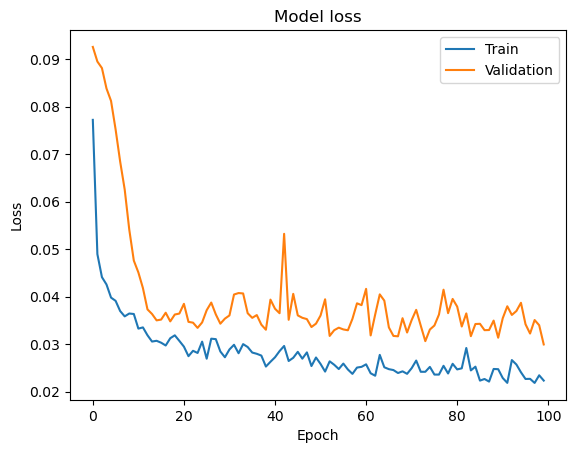

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


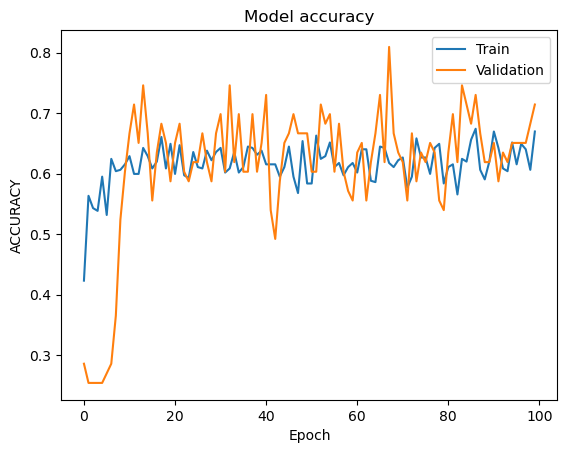

In [10]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('ACCURACY')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [11]:
import tensorflow as tf  # Import TensorFlow

# Save the model
model.save('model.h5')

# Load the model
loaded_model = tf.keras.models.load_model('model.h5')


In [12]:
model.save('COLORCONTRAST.h5')

In [13]:
model.save('model', save_format='tf')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model\assets


In [17]:
import numpy as np
import tensorflow as tf  # Assuming TensorFlow/Keras model

# Load the model
#model = tf.keras.models.load_model('path_to_your_model.h5')  # Replace with your model's path

# Example inputs (replace these with your actual input format)
# Input format: Background and text colors [R_bg, G_bg, B_bg, R_text, G_text, B_text]
input_data = np.array([
    [255, 255, 255, 0, 0, 0],    # Example 1: White background, Black text
    [0, 0, 255, 255, 255, 0],    # Example 2: Blue background, Yellow text
    [200, 200, 200, 50, 50, 50]  # Example 3: Gray background, Dark gray text
])

# Preprocess inputs (e.g., scaling)
input_data = input_data / 255.0  # Normalize to [0, 1]

# Get predictions
predicted_colors = model.predict(input_data)

# Post-process and display results
# Assuming the model outputs corrected text colors [R_text_new, G_text_new, B_text_new]
for i, (input_colors, new_colors) in enumerate(zip(input_data, predicted_colors)):
    # Scale back to [0, 255] if necessary
    new_colors = (new_colors * 255).astype(int)
    input_colors = (input_colors * 255).astype(int)
    
    print(f"Input {i+1}:")
    print(f"  Original Background Color: [{input_colors[0]}, {input_colors[1]}, {input_colors[2]}]")
    print(f"  Original Text Color: [{input_colors[3]}, {input_colors[4]}, {input_colors[5]}]")
    print(f"  Suggested Text Color: [{new_colors[0]}, {new_colors[1]}, {new_colors[2]}]")


Input 1:
  Original Background Color: [255, 255, 255]
  Original Text Color: [0, 0, 0]
  Suggested Text Color: [250, 247, 244]
Input 2:
  Original Background Color: [0, 0, 255]
  Original Text Color: [255, 255, 0]
  Suggested Text Color: [7, 10, 215]
Input 3:
  Original Background Color: [200, 200, 200]
  Original Text Color: [50, 50, 50]
  Suggested Text Color: [210, 202, 200]


In [18]:
# Get the input shape
input_shape = model.input_shape
print(input_shape)

(None, 6)
